In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

In [4]:
df = pd.read_csv('goodreads.csv')

In [5]:
df_counts = pd.read_csv('Ratings_count.csv')

In [6]:
df_counts.head()

,Book_titles,AuthorName,Ratings,Ratings_count
0,To Kill a Mockingbird,Harper Lee,4.26,6184569
1,Harry Potter and the Sorcerer’s Stone (Harry P...,J.K. Rowling,4.47,10154742
2,Pride and Prejudice,Jane Austen,4.29,4303774
3,The Diary of a Young Girl,Anne Frank,4.19,3766481
4,Animal Farm,George Orwell,3.99,3927993


In [7]:
df_counts.rename(columns={'Book_titles': 'Book_Title'}, inplace=True)

In [8]:
df_counts['Book_Title'] = df_counts['Book_Title'].str.split('(').str[0].str.strip()

In [9]:
df.head()

,Book_Title,Author,Genres,Rating
0,Little House in the Big Woods,Laura Ingalls Wilder,"['Classics', 'Historical Fiction', 'Childrens'...",4.20
1,Julius Caesar,William Shakespeare,"['Plays', 'Fiction', 'Drama', 'School', 'Class...",3.70
2,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,"['Historical Fiction', 'Fiction', 'Romance', '...",4.19
3,Harry Potter and the Order of the Phoenix,J.K. Rowling,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",4.50
4,The Elements of Style,William Strunk Jr.,"['Writing', 'Nonfiction', 'Reference', 'Langua...",4.18


In [10]:
df.duplicated().sum()

56

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df = df[df['Genres'].str.len() != 2]

In [13]:
df['Genres'] = df['Genres'].str.replace('[','').str.replace(']','').str.replace("'",'').str.split(', ')

In [14]:
df3 = df.explode('Genres')
df3.head()

,Book_Title,Author,Genres,Rating
0,Little House in the Big Woods,Laura Ingalls Wilder,Classics,4.2
0,Little House in the Big Woods,Laura Ingalls Wilder,Historical Fiction,4.2
0,Little House in the Big Woods,Laura Ingalls Wilder,Childrens,4.2
0,Little House in the Big Woods,Laura Ingalls Wilder,Fiction,4.2
0,Little House in the Big Woods,Laura Ingalls Wilder,Young Adult,4.2


In [15]:
pd.set_option('display.max_rows', 500)
df3['Genres'].value_counts()

Genres
Fiction                       419
Classics                      212
Fantasy                       141
Nonfiction                    123
Literature                    117
Historical Fiction            117
Young Adult                   111
Novels                        111
Contemporary                   91
Romance                        81
Thriller                       80
Mystery                        79
Historical                     76
Audiobook                      75
Science Fiction                63
Adventure                      61
Philosophy                     50
History                        49
Drama                          44
Horror                         42
Childrens                      42
Self Help                      41
Psychology                     41
School                         40
Biography                      39
Adult                          38
Crime                          38
Middle Grade                   36
Literary Fiction               35
Suspens

In [16]:
selected_genres = df3['Genres'].value_counts().index[:20]
selected_genres

Index(['Fiction', 'Classics', 'Fantasy', 'Nonfiction', 'Literature',
       'Historical Fiction', 'Young Adult', 'Novels', 'Contemporary',
       'Romance', 'Thriller', 'Mystery', 'Historical', 'Audiobook',
       'Science Fiction', 'Adventure', 'Philosophy', 'History', 'Drama',
       'Horror'],
      dtype='object', name='Genres')

In [17]:
df4 = df3[df3['Genres'].isin(selected_genres)]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 623
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Book_Title  2142 non-null   object 
 1   Author      2142 non-null   object 
 2   Genres      2142 non-null   object 
 3   Rating      2142 non-null   float64
dtypes: float64(1), object(3)
memory usage: 83.7+ KB


In [18]:
df5 = df4.groupby('Book_Title').agg({
    'Genres': list,
    'Rating': 'mean'
}).reset_index()


In [19]:
df5.head(20)

,Book_Title,Genres,Rating
0,100 Love Sonnets,"[Classics, Romance, Fiction]",4.35
1,11/22/1963,"[Fiction, Historical Fiction, Science Fiction,...",4.34
2,11/22/63,"[Fiction, Historical Fiction, Science Fiction,...",4.34
3,1776,"[History, Nonfiction, Historical, Audiobook]",4.09
4,1984,"[Classics, Fiction, Science Fiction, Literatur...",4.19
5,2001: A Space Odyssey,"[Science Fiction, Fiction, Classics, Fantasy, ...",4.17
6,A Conceptual Circus,"[Contemporary, Fiction]",4.47
7,A Fine Balance,"[Fiction, Historical Fiction, Historical]",4.37
8,A Fire Upon the Deep,"[Science Fiction, Fiction, Fantasy]",4.14
9,A Game of Thrones,"[Fantasy, Fiction, Adventure]",4.44


In [20]:
df6 = df5.merge(df_counts, on='Book_Title', how='inner')
df6.head()

,Book_Title,Genres,Rating,AuthorName,Ratings,Ratings_count
0,100 Love Sonnets,"[Classics, Romance, Fiction]",4.35,Pablo Neruda,4.35,17629
1,11/22/63,"[Fiction, Historical Fiction, Science Fiction,...",4.34,Stephen King,4.34,547155
2,1776,"[History, Nonfiction, Historical, Audiobook]",4.09,David McCullough,4.09,231354
3,1984,"[Classics, Fiction, Science Fiction, Literatur...",4.19,George Orwell,4.19,4658860
4,2001: A Space Odyssey,"[Science Fiction, Fiction, Classics, Fantasy, ...",4.17,Arthur C. Clarke,4.17,315482


In [21]:
def has_genre(genres, genre):
    if genre in genres:
        return 1
    else:
        return 0


for genre in selected_genres:
    df6[genre] = df6['Genres'].apply(lambda x: has_genre(x, genre)) 

In [22]:
pd.set_option('display.max_columns', 500)
df6.head()

,Book_Title,Genres,Rating,AuthorName,Ratings,Ratings_count,Fiction,Classics,Fantasy,Nonfiction,Literature,Historical Fiction,Young Adult,Novels,Contemporary,Romance,Thriller,Mystery,Historical,Audiobook,Science Fiction,Adventure,Philosophy,History,Drama,Horror
0,100 Love Sonnets,"[Classics, Romance, Fiction]",4.35,Pablo Neruda,4.35,17629,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,11/22/63,"[Fiction, Historical Fiction, Science Fiction,...",4.34,Stephen King,4.34,547155,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1776,"[History, Nonfiction, Historical, Audiobook]",4.09,David McCullough,4.09,231354,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,1984,"[Classics, Fiction, Science Fiction, Literatur...",4.19,George Orwell,4.19,4658860,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,2001: A Space Odyssey,"[Science Fiction, Fiction, Classics, Fantasy, ...",4.17,Arthur C. Clarke,4.17,315482,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Kmeans

In [23]:
from sklearn.discriminant_analysis import StandardScaler


X = df6.drop(columns=['Book_Title', 'Genres', 'Ratings', 'AuthorName'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

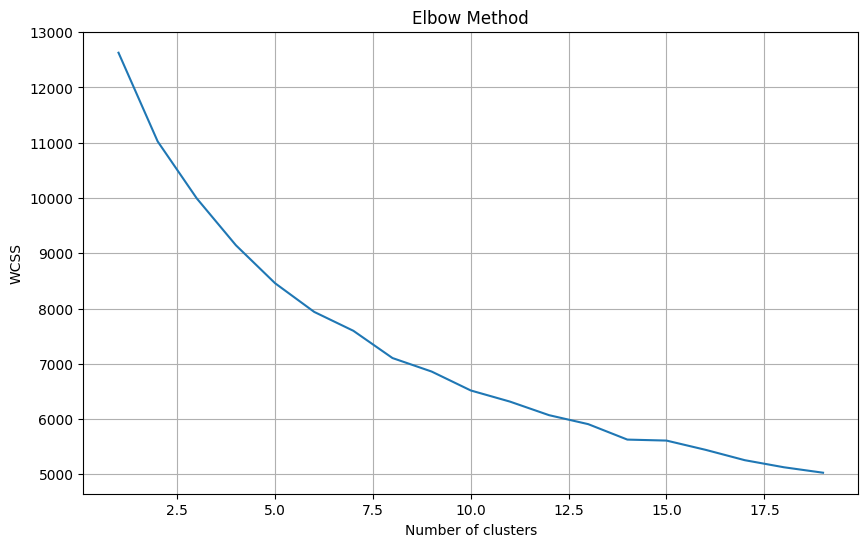

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [26]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=1)

In [27]:
y_pred = kmeans.fit_predict(X_scaled)

In [28]:
df6['kmeans'] = y_pred
df6['kmeans'].value_counts()

kmeans
3    189
1    169
0    124
2     92
Name: count, dtype: int64

### DBSCAN

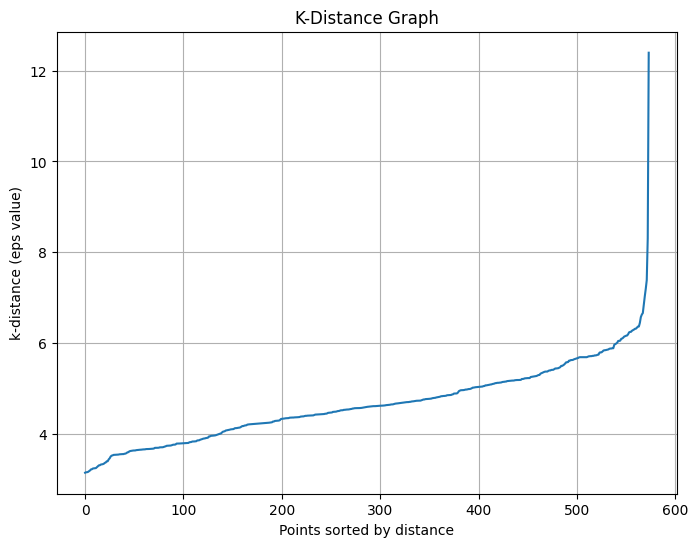

In [29]:
import numpy as np
from sklearn.neighbors import NearestNeighbors


min_sample = 45
nn = NearestNeighbors(n_neighbors=min_sample)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)
k_dist = distances[:, min_sample-1]

k_dist_sorted = np.sort(k_dist)

plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [30]:
from sklearn.cluster import DBSCAN


chosen_eps = 6
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_sample)

In [31]:
clusters = dbscan.fit_predict(X_scaled)

In [32]:
df6['dbscan'] = clusters
df6['dbscan'].value_counts()

dbscan
 0    573
-1      1
Name: count, dtype: int64

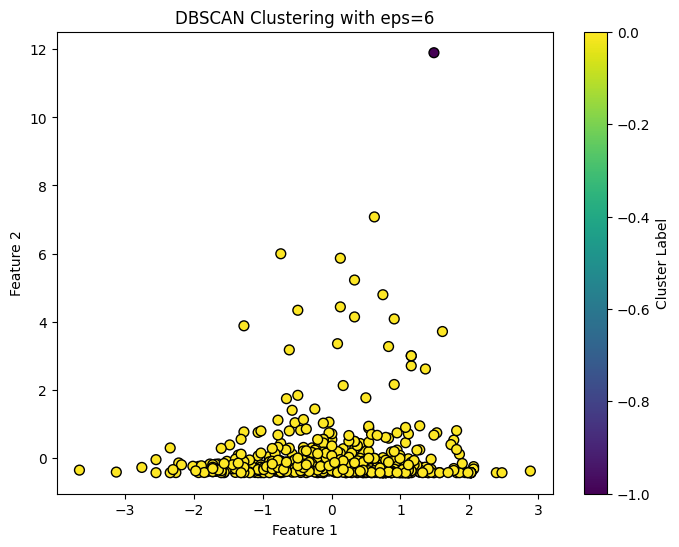

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [1]:
from fastapi.encoders import jsonable_encoder
import joblib
joblib.dump(kmeans, 'Models/kmeans.pkl')
joblib.dump(scaler, 'Models/scaler.pkl')
joblib.dump(dbscan, 'Models/dbscan.pkl')
joblib.dump(wcss, 'Models/wcss.pkl')

NameError: name 'kmeans' is not defined